# Modélisation :
Après nettoyage et analyse (univariée et bivariée) des données, nous passerons par la sélection des variables puis l'entraînement du modèle KNN sur les données initiales et transformées,puis comparerons et analyserons les performances des métriques telles que  **accuracy**, **precision**, **f1_score**, etc...

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Importation des données

In [47]:
data = pd.read_csv("initial_data.csv")
data_trans = pd.read_csv("transformed_data.csv")

In [48]:
data.head()

,income,co_income,amount,sex,married,dependents,education,self_employed,history,duration,target,area_Semiurban,area_Urban
0,0.072991,-0.554487,-0.211241,1,0,0,1,0,1,30,1,0,1
1,-0.134412,-0.038732,-0.211241,1,1,1,1,0,1,30,0,0,0
2,-0.393747,-0.554487,-0.948996,1,1,0,1,1,1,30,1,0,1
3,-0.462062,0.251980,-0.306435,1,1,0,0,0,1,30,1,0,1
4,0.097728,-0.554487,-0.056551,1,0,0,1,0,1,30,1,0,1


In [49]:
data_trans.head()

,income,co_income,amount,sex,married,dependents,education,self_employed,history,duration,target,area_Semiurban,area_Urban
0,0.516186,-1.107783,-0.012803,1,0,0,1,0,1,30,1,0,1
1,0.137806,0.782158,-0.012803,1,1,1,1,0,1,30,0,0,0
2,-0.519479,-1.107783,-1.348663,1,1,0,1,1,1,30,1,0,1
3,-0.751605,0.897526,-0.143351,1,1,0,0,0,1,30,1,0,1
4,0.555727,-1.107783,0.182981,1,0,0,1,0,1,30,1,0,1


In [50]:
# les valeurs manquantes
data.isna().sum()

income            0
co_income         0
amount            0
sex               0
married           0
dependents        0
education         0
self_employed     0
history           0
duration          0
target            0
area_Semiurban    0
area_Urban        0
dtype: int64

In [51]:
data_trans.isna().sum()

income            0
co_income         0
amount            0
sex               0
married           0
dependents        0
education         0
self_employed     0
history           0
duration          0
target            0
area_Semiurban    0
area_Urban        0
dtype: int64

# Modèles sur les données initiales (non transformées)

## Séparation des données d'apprentissage et de test

In [52]:
seed = 12

In [53]:
# variales explicatives
X = data.drop("target", axis = 1)
X

,income,co_income,amount,sex,married,dependents,education,self_employed,history,duration,area_Semiurban,area_Urban
0,0.072991,-0.554487,-0.211241,1,0,0,1,0,1,30,0,1
1,-0.134412,-0.038732,-0.211241,1,1,1,1,0,1,30,0,0
2,-0.393747,-0.554487,-0.948996,1,1,0,1,1,1,30,0,1
3,-0.462062,0.251980,-0.306435,1,1,0,0,0,1,30,0,1
4,0.097728,-0.554487,-0.056551,1,0,0,1,0,1,30,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.889500,0,0,0,1,0,1,30,0,0
610,-0.212557,-0.554487,-1.258378,1,1,3,1,0,1,15,0,0
611,0.437174,-0.472404,1.276168,1,1,1,1,0,1,30,0,1
612,0.357064,-0.554487,0.490816,1,1,2,1,0,1,30,0,1


In [54]:
# variable cible
y = data["target"]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: target, Length: 614, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, stratify = y, test_size = 0.2)

# Gestion du déséquilibre des classes avec l'***Oversampling*** :
Lorsque les classes ne sont pas équilibrées au sein de la variable cible, le modèle aura tendance à mieux prédire la classe majoritaire et pourrait être moins perdormant dans la prédiction de la classe minoritaire. Ainsi, la méthode d'**Oversampling** consiste à équilibrer les effectifs des classes dans les données d'apprentissages en augmentant artificiellement la classe minoritaire par des **tirages avec remise** au sein des données initiale de cette classe, jusqu'à obtenir des classes équilibrées.

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
# instanciation de l'objet SMOTE
sm = SMOTE(random_state = seed, sampling_strategy = 1.0)

**Sampling_strategy** est le paramètre qui détermine la proportion des observations de la classe minoritaire que l'on veut atteindre par rapport à la classe majoritaire. Ici **1.0** (100%), on veut que la classe minorité ait le même nombre d'observations ou atteigne 100% de la taille de la classe majoritaire dans notre variable cible **y_train**.

In [58]:
# proportion dans chaque classe avant le sur-échantillonnage
y_train.value_counts(normalize = True)

target
1    0.686354
0    0.313646
Name: proportion, dtype: float64

In [59]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [60]:
# proportion dans chaque classe après le sur-échantillonnage
y_train.value_counts(normalize = True)

target
1    0.5
0    0.5
Name: proportion, dtype: float64

# 1. Modèle $K$-$N$earest $N$eighbors sur les données initiales et transformées. (Avec toutes les variables)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

## A. Avec les données initiales sans transformations logarithmiques

## Recherche du paramètre $k$ optimal :
On cherche la valeur de k (nombre des plus proches voisins à considérer) qui maximise le **f1_score**.
Le **f1_score** : est une métrique d’évaluation utilisée en classification, notamment lorsque les classes sont déséquilibrées.  
Il combine la **précision** (precision) et le **rappel** (recall) en une seule valeur, via leur **moyenne harmonique** :

$$
F_1-Score = 2 \times \frac{\text{Précision} \times \text{Rappel}}{\text{Précision} + \text{Rappel}}
$$

- **Précision** = \\( \\frac{VP}{VP + FP} \\) : proportion de prédictions positives correctes.
- **Rappel** = \\( \\frac{VP}{VP + FN} \\) : proportion de vrais positifs détectés.

Un F1 score élevé signifie que le modèle a à la fois une bonne précision et un bon rappel.  
Il varie entre **0** (mauvais) et **1** (parfait).
Utile dans les cas où **les faux négatifs et les faux positifs ont un coût élevé**.


In [62]:
from sklearn.metrics import f1_score

In [63]:
# On teste 15 valeurs de k
k_range = range(1, 16)
scores = []

In [64]:
for k in k_range:
  # instanciation du modèle à la k-ième itération
  knn_model = KNeighborsClassifier(n_neighbors = k, metric = "euclidean")
  # entraînement du modèle
  knn_model.fit(X_train, y_train)
  # predictions sur les données de test
  y_pred = knn_model.predict(X_test)
  # évaluation de la performance du modèle (macro : moyenne des performances sur chaque classe)
  f1 =  f1_score(y_test, y_pred, average = "macro")
  # enregistrement du résultat
  scores.append(f1)

In [65]:
best_k = np.argmax(scores) + 1
print("La valeur de k optimale est : ", int(best_k))

La valeur de k optimale est :  12


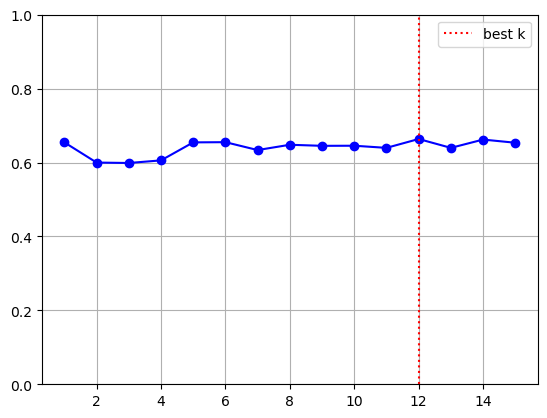

In [66]:
# visualisation des valeurs des performances en fonction de k
plt.plot(k_range, scores, marker = "o", color = "blue")
plt.axvline(x = best_k, color = "red", linestyle = "dotted", label = "best k")
plt.ylim(0, 1.0)
plt.legend()
plt.grid()
plt.show()

In [67]:
print(f"pour k = {best_k}, le f1-score est {scores[best_k]:.2f}")

pour k = 12, le f1-score est 0.64


## Modèle KNN avec le k optimal (analyse des performances) :
- **Accuracy** : la  proportion des prédictions conforme à la réalité, c'est-à-dire, les observations de la **classe 1** étant prédites appartenant à la **classe 1** et ceux de la **classe 2** qui ont été prédites correctement , par rapport au nombres des toutes les observations

- **precision** : la proportion des **prédictions positives correctement** (vrai positif) par rapport aux prédictions positives du modèle (**vrai positif** et **faux positif**)

- **recall** : la proportion des **vraies prédictions positives du modèle** par rapport au nombre des **vrais positifs del'ensemble y_test**

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [69]:
# instanciation du modèle avec le nombre optimal des voisins
knn_model = KNeighborsClassifier(n_neighbors = best_k, metric = "euclidean")

In [70]:
# entraînement du modèle
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [71]:
# prédictions sur les données de test
y_pred = knn_model.predict(X_test)

In [72]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pd.DataFrame({"ratio" : [acc, prec, rec]}, index = ["accuracy", "precision", "recall"])

,ratio
accuracy,0.699187
precision,0.807692
recall,0.741176


**Interprétation**
1. accuracy : 69% d'observations ont été prédites correctement ( vrais positifs et vrais négatifs)
---
2. precision : 80% des prédictions positives du modèles ont été conforme à la réalité (vrais positifs)
---
3. recall : 74% d'observations réellement positives ont été prédites par le modèle par rapport aux vrais positifs attendus.

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [74]:
mat_confusion = confusion_matrix(y_test, y_pred)

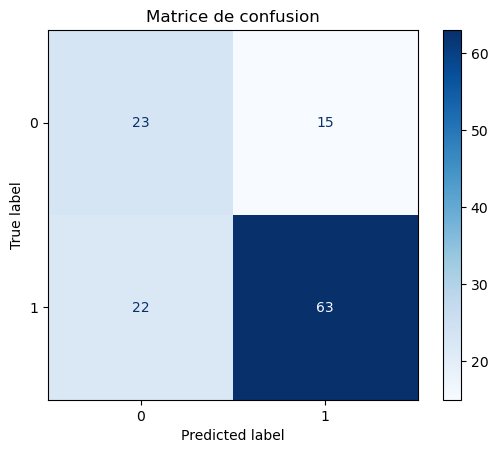

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix= mat_confusion, display_labels= knn_model.classes_)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


La matrice de confusion permet d'afficher les informations sur  le nombre d'observations prédites (vrai et faux) positives et celles prédites (vrai ou faux) négativement.

Le cas de la première ligne où sur un total de 38 observations réellement négatives, 23 ont été **prédites à raison** comme négatives, tandis que 15 ont été prédites, à tord, comme positives. Ainsi, le modèle apprend moins bien **la classe 0**. (60%)

## B. Avec les données transformées

In [76]:
X_trans = data_trans.drop("target", axis = 1)

In [77]:
y_trans = data_trans["target"]

In [78]:
# séparation en données d'apprentissage et de test
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_trans, y_trans, random_state = seed, test_size = 0.2, stratify = y_trans)

In [79]:
# déséquilibre des classes
y_train_trans.value_counts(normalize = True)

target
1    0.686354
0    0.313646
Name: proportion, dtype: float64

In [80]:
# équilibrage des classes
X_train_trans, y_train_trans = sm.fit_resample(X_train_trans, y_train_trans)

In [81]:
y_train_trans.value_counts(normalize = True)

target
1    0.5
0    0.5
Name: proportion, dtype: float64

In [82]:
# Recherche du K optimal
scores_trans = []
for k in k_range:
  # instanciation du modèle à la k-ième itération
  knn_model = KNeighborsClassifier(n_neighbors = k, metric = "euclidean")
  # entraînement du modèle
  knn_model.fit(X_train_trans, y_train_trans)
  # predictions sur les données de test
  y_pred = knn_model.predict(X_test_trans)
  # évaluation de la performance du modèle (macro : moyenne des performances sur chaque classe)
  f1 =  f1_score(y_test, y_pred, average = "macro")
  # enregistrement du résultat
  scores_trans.append(f1)

In [83]:
best_k_trans = np.argmax(scores_trans) + 1
print("La valeur de k optimale est : ", int(best_k_trans))

La valeur de k optimale est :  9


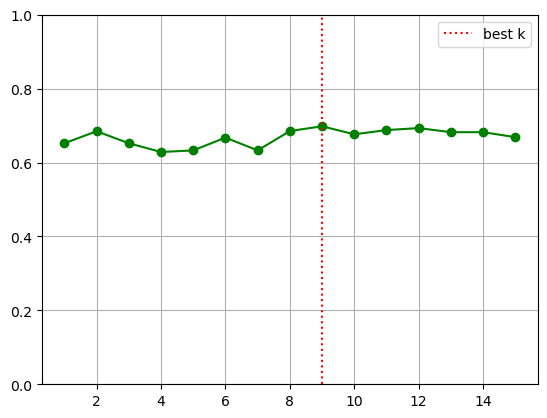

In [84]:
# visualisation des valeurs des performances en fonction de k
plt.plot(k_range, scores_trans, marker = "o", color = "green")
plt.axvline(x = best_k_trans, color = "red", linestyle = "dotted", label = "best k")
plt.ylim(0, 1.0)
plt.legend()
plt.grid()
plt.show()

In [85]:
print(f"pour k = {best_k_trans}, le f1-score est {scores_trans[best_k_trans]:.2f}")

pour k = 9, le f1-score est 0.68


In [86]:
# instanciation du modèle avec le nombre optimal des voisins
knn_model_trans = KNeighborsClassifier(n_neighbors = best_k_trans, metric = "euclidean")

In [87]:
# entraînement du modèle
knn_model_trans.fit(X_train_trans, y_train_trans)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [88]:
# prédictions sur les données de test
y_pred_trans = knn_model_trans.predict(X_test_trans)

In [89]:
acc_trans = accuracy_score(y_test_trans, y_pred_trans)
prec_trans = precision_score(y_test_trans, y_pred_trans)
rec_trans = recall_score(y_test_trans, y_pred_trans)
comparatif = pd.DataFrame({"initial" : [acc, prec, rec], "transformed" : [acc_trans, prec_trans, rec_trans]}, index = ["accuracy", "precision", "recall"])
comparatif["diff"] = comparatif["transformed"] - comparatif["initial"]
comparatif = comparatif* 100
comparatif

,initial,transformed,diff
accuracy,69.918699,74.796748,4.878049
precision,80.769231,80.681818,-0.087413
recall,74.117647,83.529412,9.411765


**Interprétation**
1. accuracy : on remarque une augementation du pourcentage des prédictions correctes, soit 74% au lieu de 69% avec les données non transformées.
---
2. precision : 80% d'individus de la classe 1 sont correctement prédits (proportion quasi-identique au modèle précédent)
---
3. recall : 83% d'observations réellement positives ont été prédites par le modèle par rapport aux vrais positifs attendus. Soit près de 10% supplémentaires

**Conclusion** : Le modèle knn entraîné sur les données transformées (logarithme) a des meilleures performances

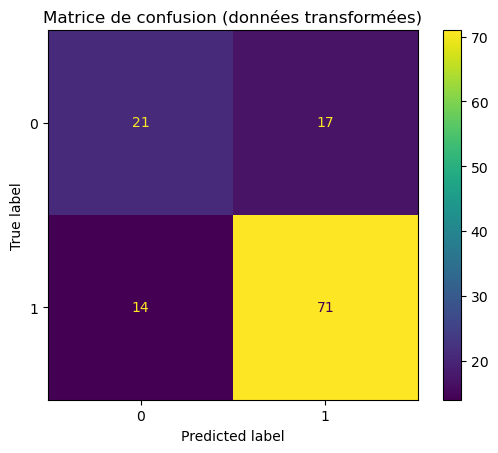

In [90]:
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test_trans, y_pred_trans) , display_labels= knn_model_trans.classes_)
disp.plot(cmap='viridis')
plt.title("Matrice de confusion (données transformées)")
plt.show()


- Sur 85 observations de **la classe 1**, 71 sont correctement prédites comme appartennat à la classe 1, soit 80%, et 14 sont mal classées.
- On observe que **la classe 0** est mal prédites avec 21 pédictions correctes sur 38 attendues (55%)